
*Note:* You can run this from your computer (Jupyter or terminal), or use one of the
hosted options:
[![binder-logo](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fspec-api-sql%252FREADME.ipynb%26branch%3Dmaster)
[![deepnote-logo](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://deepnote.com/launch?template=deepnote&url=https://github.com/ploomber/projects/blob/master/spec-api-sql/README.ipynb)


# SQL/Python pipeline example

This demo showcases the spec API that allows you to write pipelines using YAML files so you can focus on the Data Science and not dealing which complex task dependencies nor managing database connections.

Let's take a look at the pipeline definition:

In [1]:

from pathlib import Path
from IPython.display import Markdown

Markdown('```yaml\n{}\n```'.format(Path('pipeline.yaml').read_text()))

```yaml
meta:
  extract_product: False

  product_default_class:
    SQLScript: SQLiteRelation

  jupyter_hot_reload: True

config:
  hot_reload: True

clients:
  # tasks
  SQLScript: config.get_client
  SQLDump: config.get_client
  # products
  SQLiteRelation: config.get_client

tasks:
  - source: filter_sales.sql
    product: [filtered_sales, table]
    name: filter_sales

  - source: group_sales.sql
    product: [grouped_sales, table]
    name: group_sales

  - source: filter_prices.sql
    product: [filtered_prices, table]
    name: filter_prices

  - source: join.sql
    product: [joined, table]
    name: join

  - class: SQLDump
    source: join_dump.sql
    product: output/joined_data.csv
    name: join_dump
    chunksize: null

  - source: plot.py
    product: output/plot.html
```

The first two sections configure our pipeline, the `tasks` section is the actual pipeline definition. Each element defines a task, we see that we have a few SQL transformations, then we dump a table to a CSV file and we produce an HTML report at the end. The order here doesn't matter, the source code itself declares its own upstream dependencies and Ploomber extracts them to execute your pipeline.

Let's take a look at one of the SQL files:

In [2]:

Markdown('```sql\n{}\n```'.format(Path('join.sql').read_text()))

```sql
-- this placeholder will be replaced at runtime
DROP TABLE IF EXISTS {{product}};

CREATE TABLE {{product}} AS
SELECT product_id, count * price AS revenue
-- declare dependencies using the name (or source if no name was declared)
-- of the task that should run first
FROM {{upstream['group_sales']}}
JOIN {{upstream['filter_prices']}}
USING (product_id);

```

Pipeline plot:

In [3]:
%%sh
# Note: plotting doesn't work in deepnote
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 6/6 [00:00<00:00, 7881.56it/s]


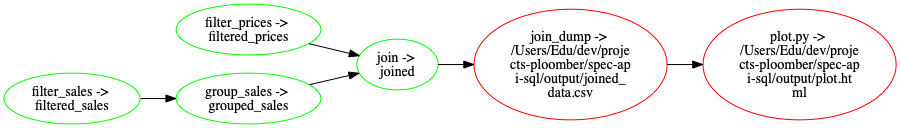

In [4]:

from IPython.display import Image
Image(filename='pipeline.png')

We can run our pipeline with the following command:

In [5]:
%%sh
ploomber build

name           Ran?      Elapsed (s)    Percentage
-------------  ------  -------------  ------------
join_dump      True         0.002647     0.0939727
plot.py        True         2.81413     99.906
filter_prices  False        0            0
filter_sales   False        0            0
group_sales    False        0            0
join           False        0            0


Building task "plot.py": 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


That's it. We just build our pipeline. Let's try again.

In [6]:
%%sh
ploomber build

name           Ran?      Elapsed (s)    Percentage
-------------  ------  -------------  ------------
filter_prices  False               0             0
filter_sales   False               0             0
group_sales    False               0             0
join           False               0             0
join_dump      False               0             0
plot.py        False               0             0


100%|██████████| 6/6 [00:00<00:00, 8609.59it/s]
0it [00:00, ?it/s]


This time it finished real quick because there is nothing to do, nothing has changed.

Let's now modify one of the tasks to see what happens (make sure you save changes):

[Click here to open plot.py](plot.py)

Also try modifying any of the SQL scripts:

[Click here to go to the spec folder](.)

Let's build again:

In [7]:
%%sh
ploomber build

name           Ran?      Elapsed (s)    Percentage
-------------  ------  -------------  ------------
filter_prices  False               0             0
filter_sales   False               0             0
group_sales    False               0             0
join           False               0             0
join_dump      False               0             0
plot.py        False               0             0


100%|██████████| 6/6 [00:00<00:00, 6255.49it/s]
0it [00:00, ?it/s]


Depending on your changes, Ploomber will determine which tasks to run again and which ones to skip.

The final output of our pipeline is a report, [let's see it](output/plot.html).

That's it! Ploomber makes it very simple to manage your data workflows.

## Where to go from here

[`etl/`](../etl/README.ipynb) contains a more complete SQL example.